---
---
# ⚛ **SENTIMENT CLASSIFICATION USING USAS SEMATIC TAGGER** ⚛
---
---



### **STEP 1: Mounting the drive and initialising the data paths**

---

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
usas_path = "/content/gdrive/MyDrive/Colab Notebooks/Lancaster University/USAS - SA/"

---
### **STEP 2: Downloading and installing the dependencies:**
>>**English PyMUSAS RuleBasedTagger**

>>**English spaCy pipeline**

>>**colorama:** *Colorama is a Python module that displays colored output in consoles.*
---



In [3]:
!pip install https://github.com/UCREL/pymusas-models/releases/download/en_dual_none_contextual-0.3.3/en_dual_none_contextual-0.3.3-py3-none-any.whl
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.0/902.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
!pip install colorama

---
### **STEP 3: Creating the tagger**

---



In [5]:
import spacy

# We exclude the following components as we do not need them.
nlp = spacy.load('en_core_web_sm', exclude=['parser', 'ner'])
# Load the English PyMUSAS rule-based tagger in a separate spaCy pipeline
english_tagger_pipeline = spacy.load('en_dual_none_contextual')
# Adds the English PyMUSAS rule-based tagger to the main spaCy pipeline
nlp.add_pipe('pymusas_rule_based_tagger', source=english_tagger_pipeline)

---

### **STEP 4: Importing the libraries**

---



In [6]:
import re
import pandas as pd
import numpy as np
from colorama import Fore, Back, Style

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


---

# **[USAS TAGS](https://ucrel.lancs.ac.uk/usas/Lancaster_visual/Frames_Lancaster.htm)**

---

### **STEP 5: Tagging text:** *tag_text function*

>>**input:** piece of text

>>**output:** python dictionary where *keys* represent the index of a sentence in the input text and *values* represent the usas semantic tags for that sentence

---



In [7]:
# Defining the tagging function
def tag_text(text):
  usas_eval_tags = {}
  usas_list = {}
  sentences = nltk.sent_tokenize(text)
  for i in range(len(sentences)):
    if(sentences[i]):
      print(Fore.GREEN + Style.BRIGHT + "------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
      print(Fore.CYAN + Style.BRIGHT + f"Sentence {i}:", sentences[i])
      print(Fore.CYAN + Style.BRIGHT + "------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
      sent = nlp(sentences[i])
      for token in sent:
        tags = token._.pymusas_tags
        print(Fore.CYAN + f'{token.text}:' + Fore.GREEN, tags)
        for tag in tags:
          usas_list[token.text] = token._.pymusas_tags
      usas_eval_tags[i] = usas_list
  return usas_eval_tags

In [8]:
# Input text 1
text_1 = """Hello comrades, just wanted to share my story after a surgery where i scored another goal against cancer and made it 3-0. Hope it will be inspiring to somebody out there.

I was diagnosed colon cancer in May 2020 when i had a major bleeding from you know where. Before i know, 30 cm. of my colon was resected by the surgeons. The recovery was tough but manageable. The good part was that even though my tumor was large, the lymph nodes were clear, making me a stage 2. According to the doctors, i was clear and was one of the lucky ones that has cancer behind now with a new good bar story to tell. The score was 1-0 for me.

Yet, later i learned the hard way that this shit can travel via bloodstream too. In January 2021, my routine scanning came back with rather unpleasant news. I had several lesions on my liver and my world collapsed when the surgeon told me it was inoperable. I was now a stage 4 colon cancer with an inoperable liver metastasis and two little boys aged 3 and 5 that i can't leave fatherless.

This was all during Corona lockdown days and my family and kids could not be with me all the time due to restrictions at the hospitals.

Nevertheless, i am not a quitter and i saw this as a new challenge that i need to beat. With low odds to start, i was free of any sign of cancer after 1,5 years long chemotherapy and radiotherapy that kicked my balls. I did not even need a liver surgery. The score was 2-0 now and we were crossing our fingers that it will never return.

It didn't, but a completely seperate cancer was going to be my new challenge now. Doctors were suspicious about my thyroid during another routine scanning. After additional screenings and needle biopsies, it turns out i have thyroid cancer now. I was like "meh, this one is easy".

Yesterday, i have all my thyroids removed in a surgery. The tumor was already 2 cm.

It is now 3-0.

I don't know what is expecting me now but surely whatever comes next, i will fight the damn thing. Meanwhile i will have preventive chemotherapy every 6 months and will keep enjoying raising my kids.

So comrade, consider yours a challenge as well. You have the strength and optimism in you too no matter how hard life is. Keep your head up and score."""

In [9]:
# Tagging input text 1
text1_tags = tag_text(text_1)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 0: Hello comrades, just wanted to share my story after a surgery where i scored another goal against cancer and made it 3-0.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hello: ['Z4']
comrades: ['S3.1/S2mf']
,: ['PUNCT']
just: ['A14', 'T3---', 'T1.3-', 'N3.3---']
wanted: ['X7+', 'S6+', 'A7+', 'G2.1-', 'S3.2', 'A9-']
to: ['Z5']
share: ['A5.4+']
my: ['A5.4+']
story: ['Q2.1', 'X4.1', 'Q4']
after: ['Z5']
a: ['Z5']
surgery: ['B3', 'B3/H1', 'B3/H2', 'S8+/T1.3']
where: ['M6']
i: ['Z8mf']
scored: ['K5', 'A5.1', 'N3.1', 'X9.2+', 'A1.1.1']
another: ['A6.1-', 'N5++']
goal: ['K5.1', 'X7+']
against: ['Z5']
cancer: ['B2-']
and: ['Z5']
made: ['A5.4+']
it: [

In [10]:
# Output tags text 1
text1_tags

{0: {'Hello': ['Z4'],
  'comrades': ['S3.1/S2mf'],
  ',': ['PUNCT'],
  'just': ['A14', 'T3---', 'T1.3-', 'N3.3---'],
  'wanted': ['X7+', 'S6+', 'A7+', 'G2.1-', 'S3.2', 'A9-'],
  'to': ['T1.1.3'],
  'share': ['A5.4+'],
  'my': ['A5.4+'],
  'story': ['Q2.1', 'X4.1', 'Q4'],
  'after': ['Z5'],
  'a': ['Z5'],
  'surgery': ['B3', 'B3/H1', 'B3/H2', 'S8+/T1.3'],
  'where': ['M6'],
  'i': ['Z8mf'],
  'scored': ['K5', 'A5.1', 'N3.1', 'X9.2+', 'A1.1.1'],
  'another': ['A6.1-', 'N5++'],
  'goal': ['K5.1', 'X7+'],
  'against': ['Z5'],
  'cancer': ['B2-'],
  'and': ['Z5'],
  'made': ['A5.4+'],
  'it': ['Z8'],
  '3': ['N1'],
  '-': ['Z99'],
  '0': ['N1'],
  '.': ['PUNCT'],
  'Hope': ['A5.4+'],
  'will': ['T1.1.3'],
  'be': ['A3+', 'Z5'],
  'inspiring': ['S8+'],
  'somebody': ['Z8mfc'],
  'out': ['Z5'],
  'there': ['M6'],
  'I': ['Z8mf'],
  'was': ['A3+', 'Z5'],
  'diagnosed': ['B3', 'X2.4'],
  'colon': ['Q3', 'B1'],
  'in': ['Z5'],
  'May': ['Z2', 'Z1mf', 'T1.3'],
  '2020': ['Z2', 'Z1mf', 'T1.3'],
  

In [11]:
# Input text 2
text_2 = """Hi all,

I’m 15 years old, and i was diagnosed with osteosarcoma in May of 2019. I did 18 rounds of chemo, a limb salvage surgery on my right leg and was given the all clear in February. I recently found out I have relapsed after only three months in remission.

My oncologist gave us another treatment plan which will involve 6 cycles of a different kind of chemotherapy and surgery to remove the nodules in my lungs.

This time around I feel really scared and discouraged. I can do treatment again, i’ve done it before but I understand this time that the prognosis is much poorer especially with how fast i relapsed. I had so many things planned for my life after treatment, i’ve been getting stronger in physical therapy and this just feels so unfair, i’m scared for what my future holds and i want to be a long term survivor so badly but I honestly feel cautious to be optimistic with the numbers my oncologist gave me.

I’m not really sure why i’m posting this, i’ve never posted before but i think i’m just looking for reasons to keep going and stay positive from others in this community even when the odds are against me

sending good luck and love to you all <3"""

In [12]:
# Tagging input text 2
text2_tags = tag_text(text_2)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 0: Hi all,

I’m 15 years old, and i was diagnosed with osteosarcoma in May of 2019.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Hi: ['Z4']
all: ['N5.1+']
,: ['PUNCT']


: ['Z99']
I: ['Z8mf']
’m: ['Z99']
15: ['T3']
years: ['T3']
old: ['T3']
,: ['PUNCT']
and: ['Z5']
i: ['Z8mf']
was: ['A3+', 'Z5']
diagnosed: ['B3', 'X2.4']
with: ['Z5']
osteosarcoma: ['Z99']
in: ['Z5']
May: ['T1.3', 'Z1f']
of: ['Z5']
2019: ['N1']
.: ['PUNCT']
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 1: I did 18 rounds of

In [13]:
# Output tags text 2
text2_tags

{0: {'Hi': ['Z4'],
  'all': ['N5.1+'],
  ',': ['PUNCT'],
  '\n\n': ['Z99'],
  'I': ['Z8mf'],
  '’m': ['Z99'],
  '15': ['T3'],
  'years': ['T3'],
  'old': ['T3'],
  'and': ['T1.3'],
  'i': ['Z8mf'],
  'was': ['A3+', 'Z5'],
  'diagnosed': ['B3', 'X2.4'],
  'with': ['Z5'],
  'osteosarcoma': ['Z99'],
  'in': ['Z5'],
  'May': ['T1.3', 'Z1f'],
  'of': ['Z5'],
  '2019': ['N1'],
  '.': ['PUNCT'],
  'did': ['A1.1.1', 'G2.2-', 'X9.2+', 'E3-', 'G2.1%', 'Z5'],
  '18': ['N1'],
  'rounds': ['N5', 'K5.1', 'M1', 'F2', 'B3', 'F1', 'K2%', 'G3%'],
  'chemo': ['B3'],
  'a': ['Z5'],
  'limb': ['B1', 'L3'],
  'salvage': ['O2', 'A9+'],
  'surgery': ['T1.3'],
  'on': ['Z5'],
  'my': ['Z8'],
  'right': ['A5.3+',
   'A4.2+',
   'A1.2+',
   'G2.2+',
   'M6',
   'N3.2+',
   'A13.3',
   'A13.2'],
  'leg': ['B1', 'O2', 'N3.3'],
  'given': ['A9-', 'A1.1.1'],
  'the': ['Z5'],
  'clear': ['B2+'],
  'February': ['T1.3'],
  'recently': ['T3---'],
  'found': ['A10+', 'X2.1', 'X6+', 'T2+', 'A2.2', 'A1.1.1'],
  'out': ['Z5

In [14]:
# Input text 3
text_3 = """Mom was diagnosed with stage 4 cancer back in June. She'd been feeling pain for some time but kept it to herself until it was too late. A biopsy later revealed it was breast cancer that had metastasized to her bones. The doctors gave her six months to live without treatment so Mom opted to start treatment right away, but due to poor health insurance, the current Covid epidemic, and the pitfalls of bureaucracy she didn't get into the hospital until over a month later.

Since her health was already deteriorating so fast she basically had lost the ability to walk on her own at this point. There was a tumor on her spine and the doctors said if she didn't have surgery to remove it soon that she would be paralyzed for the remainder of her life. She had a spinal fusion which went well and at this point we were all hopeful and talking about life after moving her back home to live with everyone.
Since time was of the essence and she and everyone in our family agreed that she wanted to pursue treatment, she was given hormone therapy and her first round of chemo within a week of her surgery. Unfortunately, a few days later she developed pneumonia. Shortly thereafter, she had developed sepsis and a host of other infections and was put on a ventilator. At this point the doctors were already recommending palliative care and taking her off the ventilator to "die with dignity." One by one her organs began to fail her. First her right lung collapsed. Then her kidney started failing.

And finally last night, I watched her die through a phone. For me, the worst part about this was that I couldn't be there for her in person. I live abroad in China, and do to the current epidemic I cannot come back here if I were to leave and go back to the States. I have a wife and family here, so I opted to stay with the hope that she would get better and I could visit next year. Unfortunately, it didn't work out.

She kept her eyes open the whole night until she finally fell asleep. I looked into her eyes and could see that she wasn't ready to go. My family that was with her were doing their best to send her off peacefully, but I got a little frustrated that they just kept offering her platitudes about going in peace, like they were just waiting for her to die, when it was so clear that she didn't want to go yet.

In the aftermath, I'm feeling immense anger and guilt. Anger towards a medical system that I view as having failed her. If she had never opted for treatment and just gotten palliative care, it's likely that she would have had more time and wouldn't have had to spend her last weeks on a ventilator in so much suffering. Anger that we all trusted the doctors and yet she died within weeks of entering the hospital. I'm no doctor, but in hindsight it seems clear that she was too weak to start treatment and needed more time to recover from her surgery and really make an informed decision whether treatment was the best course of action. It feels like the whole situation was so rushed.

And of course, guilt that I wasn't there for her in her greatest time of need. I'm her only son, and when she needed me most I wasn't there for her. We only got to have one conversation while she could still speak, and it was so rushed and hectic. Thanks to China banning all foreigns apps, I could not communicate with her directly even with a VPN and had to rely on my Aunt who had WeChat to video with her. Even though I got to say goodbye and speak with her at the end, it still doesn't feel the same as a real conversation would have. I don't know if I will ever forgive myself for not going back to see her and hug her one last time.

That's all I have to say. I don't have many friends so it helps to get these feelings off my chest anonymously. Having experienced this first hand, I empathize so much more now with everyone here as I've been reading your experiences these last couple months. Cancer is a scourge to mankind and there's no platitudes to ease the pain."""

In [15]:
# Tagging input text 3
text3_tags = tag_text(text_3)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 0: Mom was diagnosed with stage 4 cancer back in June.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Mom: ['S4/S2.1f']
was: ['A3+', 'Z5']
diagnosed: ['B3', 'X2.4']
with: ['Z5']
stage: ['T1.2', 'N5.1-', 'H2/K4', 'K4', 'A4.1']
4: ['N1']
cancer: ['B2-']
back: ['M6', 'N6+', 'T1.1.1', 'S1.1.2+']
in: ['Z5']
June: ['T1.3', 'Z1f']
.: ['PUNCT']
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 1: She'd been feeling pain for some time but kept it to herself until it was too late.
------------------------

In [16]:
# Output tags text 3
text3_tags

{0: {'Mom': ['S4/S2.1f'],
  'was': ['A3+', 'Z5'],
  'diagnosed': ['B3', 'X2.4'],
  'with': ['Z5'],
  'stage': ['T1.2', 'N5.1-', 'H2/K4', 'K4', 'A4.1'],
  '4': ['N1'],
  'cancer': ['B2-'],
  'back': ['M6'],
  'in': ['Z5'],
  'June': ['T1.3', 'Z1f'],
  '.': ['PUNCT'],
  'She': ['Z8f'],
  "'d": ['A7+'],
  'been': ['A3+', 'Z5'],
  'feeling': ['X2.1', 'E1', 'X3'],
  'pain': ['B2-', 'E2-', 'E4.1-'],
  'for': ['Z5'],
  'some': ['T1.3+'],
  'time': ['T1', 'T1.2', 'T1.3', 'T1.1.2', 'N6', 'N1', 'K2', 'G2.1@'],
  'but': ['Z5'],
  'kept': ['A9+', 'N6+', 'T2++', 'A1.7+', 'A2.2', 'F4', 'S8+', 'H4'],
  'it': ['Z8'],
  'to': ['Z5'],
  'herself': ['S1.2.3-'],
  'until': ['Z5'],
  'too': ['N5++', 'N5.2+', 'A13.3'],
  'late': ['T4-', 'L1-', 'T1.1'],
  'A': ['Z5'],
  'biopsy': ['B3'],
  'later': ['T4--', 'T1.1.3', 'N4'],
  'revealed': ['A5.4+'],
  'breast': ['B2-'],
  'that': ['A13.3', 'A6.1+'],
  'had': ['A9+', 'Z5', 'A2.2', 'S4'],
  'metastasized': ['Z99'],
  'her': ['A5.4+'],
  'bones': ['B1'],
  'The'

---

# ⚛ **SENTIMENT ANALYSIS** ⚛
---


### **STEP 6: USAS emotion classes**

---



In [17]:
usas_emo_cls = pd.read_excel(usas_path + "usas_emo_classes.xlsx")
usas_emo_cls_dict  = dict(zip(usas_emo_cls.Tag, usas_emo_cls.Class))

In [18]:
usas_emo_cls_dict

{'E1': 'Emotional Actions, States And Processes General',
 'E1+': 'Emotional',
 'E1-': 'Unemotional',
 'E2': 'Liking',
 'E2+': 'Like',
 'E2-': 'Dislike',
 'E3': 'Calm/Violent/Angry',
 'E3+': 'Calm',
 'E3-': 'Violent/Angry',
 'E4': 'Happiness and Contentment',
 'E4.1': 'Happy/sad',
 'E4.1+': 'Happy',
 'E4.1-': 'Sad',
 'E4.2': 'Contentment',
 'E4.2+': 'Content',
 'E4.2-': 'Discontent',
 'E5': 'Bravery and Fear',
 'E5+': 'Bravery',
 'E5-': 'Fear/shock',
 'E6': 'Worry and confidence',
 'E6+': 'Confident',
 'E6-': 'Worry'}

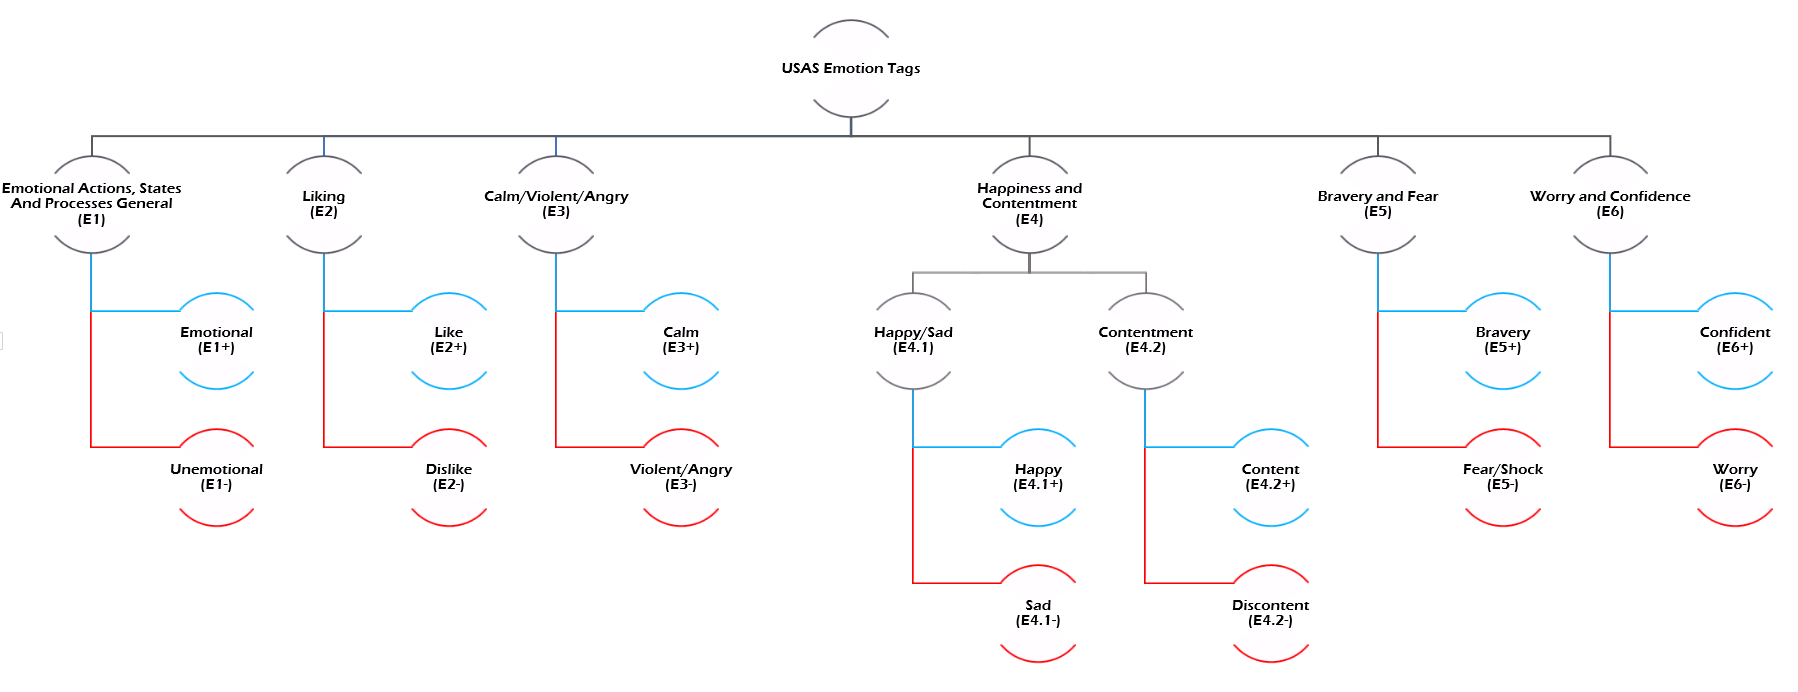

In [19]:
 # importing Image class from PIL package

import IPython.display as display
from PIL import Image

display.display(Image.open(usas_path + "usas_emo_tags.png"))


---

### **STEP 7: Extracting emotion words using USAS emotion tags:** *usas_emotion_tags function*

>>**input:** piece of text

>>**output:** python dictionary where *keys* represent a sentence in the input text and *values* represent a dictionary of usas tagged emotion words and tags for that sentence

---



In [20]:
# Defining the emotion tag extraction function
def usas_emotion_tags(text):
  usas_eval_tags = {}
  sentences = nltk.sent_tokenize(text)
  for i in range(len(sentences)):
    if(sentences[i]):
      usas_list = {}
      sent = nlp(sentences[i])
      print("\n")
      print(Fore.MAGENTA + Style.BRIGHT + "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
      print(Fore.BLUE + Style.BRIGHT + f"Sentence {i}:", sentences[i])
      for token in sent:
        tags = token._.pymusas_tags
        emo_tags = [x for x in tags if x.startswith('E')]
        if emo_tags:
          usas_list[token.text] = emo_tags
          print(Fore.MAGENTA + f'{token.text}:' + Fore.GREEN, emo_tags)
      usas_eval_tags[sentences[i]] = usas_list
  return usas_eval_tags

In [21]:
# Text 1 emotion tag extraction
text1_emo_tags = usas_emotion_tags(text_1)



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 0: Hello comrades, just wanted to share my story after a surgery where i scored another goal against cancer and made it 3-0.


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 1: Hope it will be inspiring to somebody out there.


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 2: I was diagnosed colon cancer in May 2020 when i had a major bleeding from you know where.


--------------------------------------------------------------------------

In [22]:
text1_emo_tags

{'Hello comrades, just wanted to share my story after a surgery where i scored another goal against cancer and made it 3-0.': {},
 'Hope it will be inspiring to somebody out there.': {},
 'I was diagnosed colon cancer in May 2020 when i had a major bleeding from you know where.': {},
 'Before i know, 30 cm.': {},
 'of my colon was resected by the surgeons.': {},
 'The recovery was tough but manageable.': {'tough': ['E3-']},
 'The good part was that even though my tumor was large, the lymph nodes were clear, making me a stage 2.': {},
 'According to the doctors, i was clear and was one of the lucky ones that has cancer behind now with a new good bar story to tell.': {},
 'The score was 1-0 for me.': {},
 'Yet, later i learned the hard way that this shit can travel via bloodstream too.': {},
 'In January 2021, my routine scanning came back with rather unpleasant news.': {'rather': ['E2++']},
 'I had several lesions on my liver and my world collapsed when the surgeon told me it was inoper

In [23]:
# Text 2 emotion tag extraction
text2_emo_tags = usas_emotion_tags(text_2)



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 0: Hi all,

I’m 15 years old, and i was diagnosed with osteosarcoma in May of 2019.


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 1: I did 18 rounds of chemo, a limb salvage surgery on my right leg and was given the all clear in February.
did: ['E3-']


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 2: I recently found out I have relapsed after only three months in remission.


------------------------------------------------------------

In [24]:
# Text 3 emotion tag extraction
text3_emo_tags = usas_emotion_tags(text_3)



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 0: Mom was diagnosed with stage 4 cancer back in June.


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 1: She'd been feeling pain for some time but kept it to herself until it was too late.
feeling: ['E1']
pain: ['E2-', 'E4.1-']


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 2: A biopsy later revealed it was breast cancer that had metastasized to her bones.


-------------------------------------------------------------------------------

In [25]:
text2_emo_tags

{'Hi all,\n\nI’m 15 years old, and i was diagnosed with osteosarcoma in May of 2019.': {},
 'I did 18 rounds of chemo, a limb salvage surgery on my right leg and was given the all clear in February.': {'did': ['E3-']},
 'I recently found out I have relapsed after only three months in remission.': {},
 'My oncologist gave us another treatment plan which will involve 6 cycles of a different kind of chemotherapy and surgery to remove the nodules in my lungs.': {},
 'This time around I feel really scared and discouraged.': {'feel': ['E1'],
  'scared': ['E5-', 'E6-']},
 'I can do treatment again, i’ve done it before but I understand this time that the prognosis is much poorer especially with how fast i relapsed.': {'poorer': ['E4.1--']},
 'I had so many things planned for my life after treatment, i’ve been getting stronger in physical therapy and this just feels so unfair, i’m scared for what my future holds and i want to be a long term survivor so badly but I honestly feel cautious to be o


---

### **STEP 8: USAS Sentiment Classification:** *usas_sentiment_classifier function*

>>**input:** dictionary of sentence and emotion word tags

>>**output:** sentiment class *positive*, *negative*, *neutral* with counts per class

---



In [26]:
# Defining the sentiment classifier
def usas_sentiment_classifier(usas_emo_tag, positive, negative, neutral):
  sentiment_cls = {}
  for sent, emo_dict in usas_emo_tag.items():
    neg, pos, neu = 0, 0, 0
    if(emo_dict):
      for key, val_list in emo_dict.items():
        for val in val_list:
          if val.endswith('-'):
            neg+=1
            negative+=1
          elif  val.endswith('+'):
            pos+=1
            positive+=1
          else:
            neu+=1
            neutral+=1
    else:
      neu+=1
      neutral+=1
    if neg==max(pos, neg, neu):
          sentiment = 'negative'
          sentiment_cls[sent] = sentiment
    elif pos==max(pos, neg, neu):
          sentiment = 'positive'
          sentiment_cls[sent] = sentiment
    else:
          sentiment = 'neutral'
          sentiment_cls[sent] = sentiment
    print(Fore.MAGENTA + Style.BRIGHT + "Sentence:", sent)
    print(Fore.GREEN + Style.BRIGHT + "class:", sentiment)
    print("\n")
    print(Fore.GREEN + Style.BRIGHT + "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  return sentiment_cls, positive, negative, neutral

In [27]:
# Sentiment counts and tagging
sentiments_text1, pos_text1, neg_text1, neu_text1 = usas_sentiment_classifier(text1_emo_tags, 0, 0, 0)

Sentence: Hello comrades, just wanted to share my story after a surgery where i scored another goal against cancer and made it 3-0.
class: neutral


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: Hope it will be inspiring to somebody out there.
class: neutral


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: I was diagnosed colon cancer in May 2020 when i had a major bleeding from you know where.
class: neutral


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: Before i know, 30 cm.
class

In [28]:
# Text 1 sentiment tags per sentence
sentiments_text1

{'Hello comrades, just wanted to share my story after a surgery where i scored another goal against cancer and made it 3-0.': 'neutral',
 'Hope it will be inspiring to somebody out there.': 'neutral',
 'I was diagnosed colon cancer in May 2020 when i had a major bleeding from you know where.': 'neutral',
 'Before i know, 30 cm.': 'neutral',
 'of my colon was resected by the surgeons.': 'neutral',
 'The recovery was tough but manageable.': 'negative',
 'The good part was that even though my tumor was large, the lymph nodes were clear, making me a stage 2.': 'neutral',
 'According to the doctors, i was clear and was one of the lucky ones that has cancer behind now with a new good bar story to tell.': 'neutral',
 'The score was 1-0 for me.': 'neutral',
 'Yet, later i learned the hard way that this shit can travel via bloodstream too.': 'neutral',
 'In January 2021, my routine scanning came back with rather unpleasant news.': 'positive',
 'I had several lesions on my liver and my world col

In [29]:
# Text 1 sentiment counts for per class
print(f'Text 1: positive = {pos_text1}, negative = {neg_text1}, neutral = {neu_text1}')

Text 1: positive = 3, negative = 11, neutral = 21


In [30]:
text1_emo_tags

{'Hello comrades, just wanted to share my story after a surgery where i scored another goal against cancer and made it 3-0.': {},
 'Hope it will be inspiring to somebody out there.': {},
 'I was diagnosed colon cancer in May 2020 when i had a major bleeding from you know where.': {},
 'Before i know, 30 cm.': {},
 'of my colon was resected by the surgeons.': {},
 'The recovery was tough but manageable.': {'tough': ['E3-']},
 'The good part was that even though my tumor was large, the lymph nodes were clear, making me a stage 2.': {},
 'According to the doctors, i was clear and was one of the lucky ones that has cancer behind now with a new good bar story to tell.': {},
 'The score was 1-0 for me.': {},
 'Yet, later i learned the hard way that this shit can travel via bloodstream too.': {},
 'In January 2021, my routine scanning came back with rather unpleasant news.': {'rather': ['E2++']},
 'I had several lesions on my liver and my world collapsed when the surgeon told me it was inoper

In [31]:
# Text 2 sentiment tags per sentence
sentiments_text2, pos_text2, neg_text2, neu_text2 = usas_sentiment_classifier(text2_emo_tags, 0, 0, 0)

Sentence: Hi all,

I’m 15 years old, and i was diagnosed with osteosarcoma in May of 2019.
class: neutral


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: I did 18 rounds of chemo, a limb salvage surgery on my right leg and was given the all clear in February.
class: negative


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: I recently found out I have relapsed after only three months in remission.
class: neutral


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: My oncologist gave us ano

In [32]:
# Sentiment tags for each sentence in text 2
sentiments_text2

{'Hi all,\n\nI’m 15 years old, and i was diagnosed with osteosarcoma in May of 2019.': 'neutral',
 'I did 18 rounds of chemo, a limb salvage surgery on my right leg and was given the all clear in February.': 'negative',
 'I recently found out I have relapsed after only three months in remission.': 'neutral',
 'My oncologist gave us another treatment plan which will involve 6 cycles of a different kind of chemotherapy and surgery to remove the nodules in my lungs.': 'neutral',
 'This time around I feel really scared and discouraged.': 'negative',
 'I can do treatment again, i’ve done it before but I understand this time that the prognosis is much poorer especially with how fast i relapsed.': 'negative',
 'I had so many things planned for my life after treatment, i’ve been getting stronger in physical therapy and this just feels so unfair, i’m scared for what my future holds and i want to be a long term survivor so badly but I honestly feel cautious to be optimistic with the numbers my o

In [33]:
# Text 2 sentiment counts for per class
print(f'Text 2: positive = {pos_text2}, negative = {neg_text2}, neutral = {neu_text2}')

Text 2: positive = 0, negative = 9, neutral = 7


In [34]:
text2_emo_tags

{'Hi all,\n\nI’m 15 years old, and i was diagnosed with osteosarcoma in May of 2019.': {},
 'I did 18 rounds of chemo, a limb salvage surgery on my right leg and was given the all clear in February.': {'did': ['E3-']},
 'I recently found out I have relapsed after only three months in remission.': {},
 'My oncologist gave us another treatment plan which will involve 6 cycles of a different kind of chemotherapy and surgery to remove the nodules in my lungs.': {},
 'This time around I feel really scared and discouraged.': {'feel': ['E1'],
  'scared': ['E5-', 'E6-']},
 'I can do treatment again, i’ve done it before but I understand this time that the prognosis is much poorer especially with how fast i relapsed.': {'poorer': ['E4.1--']},
 'I had so many things planned for my life after treatment, i’ve been getting stronger in physical therapy and this just feels so unfair, i’m scared for what my future holds and i want to be a long term survivor so badly but I honestly feel cautious to be o

In [35]:
# Text 3 sentiment tags per sentence
sentiments_text3, pos_text3, neg_text3, neu_text3 = usas_sentiment_classifier(text3_emo_tags, 0, 0, 0)

Sentence: Mom was diagnosed with stage 4 cancer back in June.
class: neutral


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: She'd been feeling pain for some time but kept it to herself until it was too late.
class: negative


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: A biopsy later revealed it was breast cancer that had metastasized to her bones.
class: neutral


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: The doctors gave her six months to live without treatment so Mom opted

In [36]:
# Sentiment tags for each sentence in text 3
sentiments_text3

{'Mom was diagnosed with stage 4 cancer back in June.': 'neutral',
 "She'd been feeling pain for some time but kept it to herself until it was too late.": 'negative',
 'A biopsy later revealed it was breast cancer that had metastasized to her bones.': 'neutral',
 "The doctors gave her six months to live without treatment so Mom opted to start treatment right away, but due to poor health insurance, the current Covid epidemic, and the pitfalls of bureaucracy she didn't get into the hospital until over a month later.": 'negative',
 'Since her health was already deteriorating so fast she basically had lost the ability to walk on her own at this point.': 'neutral',
 "There was a tumor on her spine and the doctors said if she didn't have surgery to remove it soon that she would be paralyzed for the remainder of her life.": 'negative',
 'She had a spinal fusion which went well and at this point we were all hopeful and talking about life after moving her back home to live with everyone.': 'pos

In [37]:
# Text 3 sentiment counts for per class
print(f'Text 3: positive = {pos_text3}, negative = {neg_text3}, neutral = {neu_text3}')

Text 3: positive = 7, negative = 32, neutral = 23


---
### **STEP 9: Sentiment Probability - Sentence-level**
---



In [38]:
# Defining the probability estimation function for sentiment classification at the sentence-level
def sentence_sentiment_prob(usas_emo_tag):
  sentiment_cls = {}
  for sent, emo_dict in usas_emo_tag.items():
    neg, pos, neu = 0, 0, 0
    if(emo_dict):
      for key, val_list in emo_dict.items():
        for val in val_list:
          if val.endswith('-'):
            neg+=1
          elif val.endswith('+'):
            pos+=1
          else:
            neu+=1
    else:
      neu+=1
    sentiment = f'positive={pos/(pos+neg+neu)}, negative={neg/(pos+neg+neu)}, neutral={neu/(pos+neg+neu)}'
    sentiment_cls[sent] = sentiment
    print(Fore.GREEN + Style.BRIGHT + "Sentence:", sent)
    print(Fore.CYAN + Style.BRIGHT + "class:", sentiment)
    print("\n")
    print(Fore.CYAN + Style.BRIGHT + "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  return sentiment_cls

In [39]:
# Text 1 sentence-level sentiment probability
sentiment_prob_text1 = (sentence_sentiment_prob(text1_emo_tags))

Sentence: Hello comrades, just wanted to share my story after a surgery where i scored another goal against cancer and made it 3-0.
class: positive=0.0, negative=0.0, neutral=1.0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: Hope it will be inspiring to somebody out there.
class: positive=0.0, negative=0.0, neutral=1.0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: I was diagnosed colon cancer in May 2020 when i had a major bleeding from you know where.
class: positive=0.0, negative=0.0, neutral=1.0


----------------------------------------------------------------------------------------------------------------------------------------------------

In [40]:
text2_emo_tags

{'Hi all,\n\nI’m 15 years old, and i was diagnosed with osteosarcoma in May of 2019.': {},
 'I did 18 rounds of chemo, a limb salvage surgery on my right leg and was given the all clear in February.': {'did': ['E3-']},
 'I recently found out I have relapsed after only three months in remission.': {},
 'My oncologist gave us another treatment plan which will involve 6 cycles of a different kind of chemotherapy and surgery to remove the nodules in my lungs.': {},
 'This time around I feel really scared and discouraged.': {'feel': ['E1'],
  'scared': ['E5-', 'E6-']},
 'I can do treatment again, i’ve done it before but I understand this time that the prognosis is much poorer especially with how fast i relapsed.': {'poorer': ['E4.1--']},
 'I had so many things planned for my life after treatment, i’ve been getting stronger in physical therapy and this just feels so unfair, i’m scared for what my future holds and i want to be a long term survivor so badly but I honestly feel cautious to be o

In [41]:
# Text 2 sentence-level sentiment probability
sentiment_prob_text2 = (sentence_sentiment_prob(text2_emo_tags))

Sentence: Hi all,

I’m 15 years old, and i was diagnosed with osteosarcoma in May of 2019.
class: positive=0.0, negative=0.0, neutral=1.0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: I did 18 rounds of chemo, a limb salvage surgery on my right leg and was given the all clear in February.
class: positive=0.0, negative=1.0, neutral=0.0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: I recently found out I have relapsed after only three months in remission.
class: positive=0.0, negative=0.0, neutral=1.0


---------------------------------------------------------------------------------------------------------------------------------------------------

In [42]:
# Text 3 sentence-level sentiment probability
sentiment_prob_text3 = (sentence_sentiment_prob(text3_emo_tags))

Sentence: Mom was diagnosed with stage 4 cancer back in June.
class: positive=0.0, negative=0.0, neutral=1.0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: She'd been feeling pain for some time but kept it to herself until it was too late.
class: positive=0.0, negative=0.6666666666666666, neutral=0.3333333333333333


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: A biopsy later revealed it was breast cancer that had metastasized to her bones.
class: positive=0.0, negative=0.0, neutral=1.0


------------------------------------------------------------------------------------------------------------------------------------------------------------------

---
### **STEP 10: Sentiment Probability -Text-level**
---



In [43]:
def text_sentiment_prob(text, pos, neg, neu):
  prob = f'positive={pos/(pos+neg+neu)}, negative={neg/(pos+neg+neu)}, neutral={neu/(pos+neg+neu)}'
  print(Fore.CYAN+ text)
  print(Fore.GREEN+ "----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  print(prob)
  return prob

In [44]:
text1_prob = text_sentiment_prob(text_1, pos_text1, neg_text1, neu_text1)

Hello comrades, just wanted to share my story after a surgery where i scored another goal against cancer and made it 3-0. Hope it will be inspiring to somebody out there.

I was diagnosed colon cancer in May 2020 when i had a major bleeding from you know where. Before i know, 30 cm. of my colon was resected by the surgeons. The recovery was tough but manageable. The good part was that even though my tumor was large, the lymph nodes were clear, making me a stage 2. According to the doctors, i was clear and was one of the lucky ones that has cancer behind now with a new good bar story to tell. The score was 1-0 for me.

Yet, later i learned the hard way that this shit can travel via bloodstream too. In January 2021, my routine scanning came back with rather unpleasant news. I had several lesions on my liver and my world collapsed when the surgeon told me it was inoperable. I was now a stage 4 colon cancer with an inoperable liver metastasis and two little boys aged 3 and 5 that i can't l

In [45]:
text2_prob = text_sentiment_prob(text_2, pos_text2, neg_text2, neu_text2)

Hi all,

I’m 15 years old, and i was diagnosed with osteosarcoma in May of 2019. I did 18 rounds of chemo, a limb salvage surgery on my right leg and was given the all clear in February. I recently found out I have relapsed after only three months in remission.

My oncologist gave us another treatment plan which will involve 6 cycles of a different kind of chemotherapy and surgery to remove the nodules in my lungs.

This time around I feel really scared and discouraged. I can do treatment again, i’ve done it before but I understand this time that the prognosis is much poorer especially with how fast i relapsed. I had so many things planned for my life after treatment, i’ve been getting stronger in physical therapy and this just feels so unfair, i’m scared for what my future holds and i want to be a long term survivor so badly but I honestly feel cautious to be optimistic with the numbers my oncologist gave me.

I’m not really sure why i’m posting this, i’ve never posted before but i th

In [46]:
text3_prob = text_sentiment_prob(text_3, pos_text3, neg_text3, neu_text3)

Mom was diagnosed with stage 4 cancer back in June. She'd been feeling pain for some time but kept it to herself until it was too late. A biopsy later revealed it was breast cancer that had metastasized to her bones. The doctors gave her six months to live without treatment so Mom opted to start treatment right away, but due to poor health insurance, the current Covid epidemic, and the pitfalls of bureaucracy she didn't get into the hospital until over a month later.

Since her health was already deteriorating so fast she basically had lost the ability to walk on her own at this point. There was a tumor on her spine and the doctors said if she didn't have surgery to remove it soon that she would be paralyzed for the remainder of her life. She had a spinal fusion which went well and at this point we were all hopeful and talking about life after moving her back home to live with everyone.
Since time was of the essence and she and everyone in our family agreed that she wanted to pursue tr

---
# ⚛ **EMOTION ANALYSIS** ⚛
---






---

### **STEP 11: USAS Emotion Classification:** *usas_emotion_classifier function*

>>**input:** piece of text

>>**output:** python dictionary where *keys* represent a sentence in the input text and *values* represent a dictionary of usas emotion classes for that sentence

---



In [47]:
# Defining the emotion extraction function
def usas_emotion_classifier(text):
  usas_eval_tags = {}
  sentences = nltk.sent_tokenize(text)
  for i in range(len(sentences)):
    if(sentences[i]):
      usas_list = {}
      sent = nlp(sentences[i])
      print("\n")
      print(Fore.CYAN + Style.BRIGHT + "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
      print(Fore.CYAN + Style.BRIGHT + f"Sentence {i}:", sentences[i])
      for token in sent:
        tags = token._.pymusas_tags
        emo_tags = [x for x in tags if x.startswith('E')]
        emo_cls = [usas_emo_cls_dict[tag[:-1]]  if (tag[-2]=="+") or (tag[-2]=="-") else usas_emo_cls_dict[tag] for tag in emo_tags]
        if emo_tags:
          usas_list[token.text] = emo_cls
          print(Fore.CYAN +  Style.BRIGHT + f'{token.text}:' + Fore.GREEN, emo_tags)
          print(Fore.CYAN + Style.BRIGHT + 'class:' + Fore.RED, emo_cls)
      usas_eval_tags[sentences[i]] = usas_list
  return usas_eval_tags

In [48]:
# Text 1 emotion extraction sentence level
text1_emotion_cls = usas_emotion_classifier(text_1)



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 0: Hello comrades, just wanted to share my story after a surgery where i scored another goal against cancer and made it 3-0.


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 1: Hope it will be inspiring to somebody out there.


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 2: I was diagnosed colon cancer in May 2020 when i had a major bleeding from you know where.


--------------------------------------------------------------------------

In [49]:
# Text 1 output usas emotion classes
text1_emotion_cls

{'Hello comrades, just wanted to share my story after a surgery where i scored another goal against cancer and made it 3-0.': {},
 'Hope it will be inspiring to somebody out there.': {},
 'I was diagnosed colon cancer in May 2020 when i had a major bleeding from you know where.': {},
 'Before i know, 30 cm.': {},
 'of my colon was resected by the surgeons.': {},
 'The recovery was tough but manageable.': {'tough': ['Violent/Angry']},
 'The good part was that even though my tumor was large, the lymph nodes were clear, making me a stage 2.': {},
 'According to the doctors, i was clear and was one of the lucky ones that has cancer behind now with a new good bar story to tell.': {},
 'The score was 1-0 for me.': {},
 'Yet, later i learned the hard way that this shit can travel via bloodstream too.': {},
 'In January 2021, my routine scanning came back with rather unpleasant news.': {'rather': ['Like']},
 'I had several lesions on my liver and my world collapsed when the surgeon told me it 

In [50]:
# Text 2 emotion extraction sentence level
text2_emotion_cls = usas_emotion_classifier(text_2)



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 0: Hi all,

I’m 15 years old, and i was diagnosed with osteosarcoma in May of 2019.


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 1: I did 18 rounds of chemo, a limb salvage surgery on my right leg and was given the all clear in February.
did: ['E3-']
class: ['Violent/Angry']


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 2: I recently found out I have relapsed after only three months in remission.


-----------------------------------

In [51]:
# Text 2 output usas emotion classes
text2_emotion_cls

{'Hi all,\n\nI’m 15 years old, and i was diagnosed with osteosarcoma in May of 2019.': {},
 'I did 18 rounds of chemo, a limb salvage surgery on my right leg and was given the all clear in February.': {'did': ['Violent/Angry']},
 'I recently found out I have relapsed after only three months in remission.': {},
 'My oncologist gave us another treatment plan which will involve 6 cycles of a different kind of chemotherapy and surgery to remove the nodules in my lungs.': {},
 'This time around I feel really scared and discouraged.': {'feel': ['Emotional Actions, States And Processes General'],
  'scared': ['Fear/shock', 'Worry']},
 'I can do treatment again, i’ve done it before but I understand this time that the prognosis is much poorer especially with how fast i relapsed.': {'poorer': ['Sad']},
 'I had so many things planned for my life after treatment, i’ve been getting stronger in physical therapy and this just feels so unfair, i’m scared for what my future holds and i want to be a lon

In [52]:
# Text 3 emotion extraction sentence level
text3_emotion_cls = usas_emotion_classifier(text_3)



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 0: Mom was diagnosed with stage 4 cancer back in June.


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 1: She'd been feeling pain for some time but kept it to herself until it was too late.
feeling: ['E1']
class: ['Emotional Actions, States And Processes General']
pain: ['E2-', 'E4.1-']
class: ['Dislike', 'Sad']


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sentence 2: A biopsy later revealed it was breast cancer that had metastasized to her bon

In [53]:
# Text 3 output usas emotion classes
text3_emotion_cls

{'Mom was diagnosed with stage 4 cancer back in June.': {},
 "She'd been feeling pain for some time but kept it to herself until it was too late.": {'feeling': ['Emotional Actions, States And Processes General'],
  'pain': ['Dislike', 'Sad']},
 'A biopsy later revealed it was breast cancer that had metastasized to her bones.': {},
 "The doctors gave her six months to live without treatment so Mom opted to start treatment right away, but due to poor health insurance, the current Covid epidemic, and the pitfalls of bureaucracy she didn't get into the hospital until over a month later.": {'start': ['Fear/shock',
   'Violent/Angry'],
  'poor': ['Sad'],
  'did': ['Violent/Angry'],
  'get': ['Sad']},
 'Since her health was already deteriorating so fast she basically had lost the ability to walk on her own at this point.': {},
 "There was a tumor on her spine and the doctors said if she didn't have surgery to remove it soon that she would be paralyzed for the remainder of her life.": {'did': 